# DATA2001 Assignment 2
## Unstructured Data Analysis
### Jamie Katsamatsas s4674720
### <date>

# Task 1 - Data Preparation
Read the dataset using the “pandas” library. Columns ‘Id’, ‘Score’ and ‘Text’
are the only columns that should be used, and other columns must be ignored. To perform
sentiment analysis, annotate the review dataset using already provided score column. Create
new column ‘Label’. Assign ‘pos’ – positive for the product ratings 4 and 5. Assign ‘neg’ –
negative for the product ratings 1 and 2. Product rating with score 3 should be ignored and
dropped from the dataset. After annotating, produce the summary of the dataset. How many
positive and negative reviews are present in the data. Print your summary.

Column Descriptions
- Id – review id
- ProductId – id of the product
- UserId – id of the user
- ProfileName – name of the user
- HelpfulnessNumerator – fraction of users who found the review helpful (numerator part)
- HelpfulnessDenominator – fraction of users who found the review helpful (denominator part)
- Score – rating of the product
- Time – time of the review (in unix time)
- Summary – review summary
- Text – text of the review

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load data
data = pd.read_csv("dataset.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
2,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
3,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...
4,39,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...


In [3]:
# Prediction dataset will need to be cleaned the same as the train test data
predict_data = pd.read_csv("predictdata.csv")

In [4]:
# inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30365 entries, 0 to 30364
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      30365 non-null  int64 
 1   ProductId               30365 non-null  object
 2   UserId                  30365 non-null  object
 3   ProfileName             30363 non-null  object
 4   HelpfulnessNumerator    30365 non-null  int64 
 5   HelpfulnessDenominator  30365 non-null  int64 
 6   Score                   30365 non-null  int64 
 7   Time                    30365 non-null  int64 
 8   Summary                 30365 non-null  object
 9   Text                    30365 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.3+ MB


In [5]:
# drop all columns besides 'id', 'score', 'text'
data.drop(data.columns.difference(['Id', 'Score', 'Text']), axis=1, inplace=True)
data.head(10)

,Id,Score,Text
0,2,1,Product arrived labeled as Jumbo Salted Peanut...
1,5,5,Great taffy at a great price. There was a wid...
2,10,5,This is a very healthy dog food. Good for thei...
3,17,2,I love eating them and they are good for watch...
4,39,4,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...
5,53,4,This wasn't in stock the last time I looked. I...
6,56,5,We roast these in a large cast iron pan on the...
7,77,5,These looked like a perfect snack to through i...
8,78,5,These taste really good. I have been purchasin...
9,79,3,"The taste was great, but the berries had melte..."


In [6]:
# Do samne for predict data
predict_data.drop(predict_data.columns.difference(['Id', 'Score', 'Text']), axis=1, inplace=True)

In [7]:
# drop rows where "Score" == 3
# https://www.statology.org/pandas-drop-rows-with-value/
data = data[data["Score"] != 3]
data.head(10)

,Id,Score,Text
0,2,1,Product arrived labeled as Jumbo Salted Peanut...
1,5,5,Great taffy at a great price. There was a wid...
2,10,5,This is a very healthy dog food. Good for thei...
3,17,2,I love eating them and they are good for watch...
4,39,4,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...
5,53,4,This wasn't in stock the last time I looked. I...
6,56,5,We roast these in a large cast iron pan on the...
7,77,5,These looked like a perfect snack to through i...
8,78,5,These taste really good. I have been purchasin...
10,90,5,Great food! I love the idea of one food for al...


In [8]:
data['Score'].value_counts()

5    19354
4     3874
1     3162
2     1664
Name: Score, dtype: int64

In [9]:
# Create label column
# https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d
def sentiment(row):
    if row["Score"] in [4, 5]:
        return 'pos'
    elif row["Score"] in [1, 2]:
        return 'neg'

In [10]:
data['Label'] = data.apply(lambda row: sentiment(row), axis=1)

In [11]:
predict_data['Label'] = data.apply(lambda row: sentiment(row), axis=1)

In [12]:
data.head()

,Id,Score,Text,Label
0,2,1,Product arrived labeled as Jumbo Salted Peanut...,neg
1,5,5,Great taffy at a great price. There was a wid...,pos
2,10,5,This is a very healthy dog food. Good for thei...,pos
3,17,2,I love eating them and they are good for watch...,neg
4,39,4,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,pos


In [13]:
data['Label'].value_counts()

pos    23228
neg     4826
Name: Label, dtype: int64

<AxesSubplot:title={'center':'Distribution of Sentiment'}, ylabel='Label'>

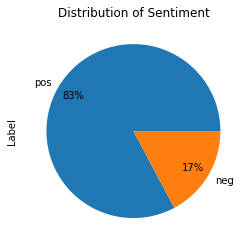

In [14]:
sentiment_distribution = data['Label'].value_counts(dropna=False, normalize=True)
sentiment_distribution.plot.pie(autopct="%1.0f%%", pctdistance=0.8, radius=1, title="Distribution of Sentiment")

In the dataset there are 23228 positive reviews and 4826 negative reviews. Which results in 83% positive and 17% negative indicating that the dataset is imbalanced.

# Task 2 - Data Cleaning
Write the necessary scripts to clean the text in the review dataset and explain
the steps along with the justification in less than 4 lines.

In [15]:
# discard the duplicates
data.drop_duplicates(keep='first', inplace=True)
data.count()

Id       28054
Score    28054
Text     28054
Label    28054
dtype: int64

##### Clean the labelled data

In [16]:
import re

def clean_review(review):
    
    # remove new line characters (\n)
    review = re.sub(r"\\n"," ", review)
    
    # remove any weired characters
    review = re.sub(r"[^A-Za-z*'-]+", " ", review)
    
    # convert review text to lowercase
    review = review.lower().strip()
    
    # remove </br> tag
    review = review.replace('</br>', ' ')
    
     # remove <br> tag
    review = review.replace('<br>', ' ')
    
    # remove any html tags
    # https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python
    review = re.sub('<[^<]+>', ' ', review)
    
    review = review.replace(' br ', ' ')
    
    return review

In [17]:
cleaned_reviews = data[:]
cleaned_reviews["Text"] = cleaned_reviews["Text"].apply(clean_review)
cleaned_reviews.head()

,Id,Score,Text,Label
0,2,1,product arrived labeled as jumbo salted peanut...,neg
1,5,5,great taffy at a great price there was a wide ...,pos
2,10,5,this is a very healthy dog food good for their...,pos
3,17,2,i love eating them and they are good for watch...,neg
4,39,4,i was visiting my friend nate the other mornin...,pos


In [18]:
cleaned_predict_data = predict_data[:]
cleaned_predict_data["Text"] = cleaned_predict_data["Text"].apply(clean_review)

# Task 3 - Logistic Regression Model
Build a logistic regression text classifier to categorise whether review has positive or negative
sentiment. 70% of the reviews should be used for training and the remaining 30% for the
testing. List the steps taken in your own words to build the model in less than 4 lines.

In [19]:
# define number of training and test samples
total_rows = len(cleaned_reviews.index)
training_perc = 0.7
test_perc = 1 - training_perc

training_samples= int(total_rows * training_perc)
test_samples = total_rows * test_perc
print(int(total_rows * training_perc))

19637


In [20]:
# https://www.statology.org/pandas-train-test/

from sklearn.model_selection import train_test_split
import numpy as np

random_state = np.random.RandomState(0)

X = cleaned_reviews['Text']
Y = cleaned_reviews['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)

print(Y_train)

259      pos
29429    pos
6427     neg
26480    neg
13808    pos
        ... 
14125    pos
21252    pos
10584    pos
11624    pos
2974     neg
Name: Label, Length: 19637, dtype: object


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4674720/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# define stop words and also add custom stop words such as
stop_words = stopwords.words('english')
stop_words.extend(['product'])

In [23]:
# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all reviews will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stop_words, min_df=0.01)

# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the BOW for train data
X_train_BOW = vectorizer.transform(X_train)

In [24]:
# visualize BOW
training_data_BOW = pd.DataFrame(data=X_train_BOW.toarray(), columns=vectorizer.get_feature_names_out()).T

# display the last few rows of the dataframe
training_data_BOW.head(5)

,0,1,2,3,4,5,6,7,8,9,...,19627,19628,19629,19630,19631,19632,19633,19634,19635,19636
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
actually,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
add,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
added,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.linear_model import LogisticRegression

# define lgositic regression model object
log_reg = LogisticRegression(random_state=random_state, max_iter=100000)

# fit the model to training data
log_reg.fit(X_train_BOW, Y_train)

LogisticRegression(max_iter=100000,
                   random_state=RandomState(MT19937) at 0x7FFF9BE65740)

In [26]:
# make prediction on test data

# create BOW for test data
X_test_BOW = vectorizer.transform(X_test)

# predict using log_reg object
y_test_log_reg_predictions = log_reg.predict(X_test_BOW)

# view the predictions
y_test_log_reg_predictions

array(['pos', 'pos', 'pos', ..., 'pos', 'pos', 'pos'], dtype=object)

# Task 4 - Evaluate Model
Evaluate the model built in the previous step and compare it with a baseline model that
assigns positive label to all test samples. A) Report accuracy and only for the negative class
report precision, recall, f1 score; and B) show a confusion matrix for both the baseline and the
logistic regression models. Explain the cause of difference between the accuracy and the f1
score of the negative class for the baseline model.

Result should be written in below format: (CHECK PDF SPEC SHEET)

    A)
    Baseline: {‘accuracy’:0.0, ‘precision’:0.0, ’recall’:0.0, ‘f1-score’:0.0}
    Logisticregression: {‘accuracy’:0.0, ‘precision’:0.0, ’recall’:0.0, ‘f1-score’:0.0}
    B)
    Confusion matrix for baseline model:

#### Generate Baseline Model

In [27]:
# identify most frequently occurring sentiment in the train data
Y_train.value_counts()

pos    16234
neg     3403
Name: Label, dtype: int64

In [28]:
# assign 'Pos' to test data
y_test_baseline_predictions = pd.Series(['pos']*len(Y_test))

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(Y_test, y_test_baseline_predictions)

0.8309373886182726

In [31]:
accuracy_score(Y_test, y_test_log_reg_predictions)

0.8834501603896875

In [32]:
from sklearn.model_selection import cross_val_score

# find accuracy of model using 3-fold cross validation
cross_val_score(LogisticRegression(max_iter=10000), X_train_BOW, Y_train, cv=5).mean()

0.88083762110658

#### Accuracy, Precision, Recall, F1 Score

In [33]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_test_baseline_predictions))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         neg       0.00      0.00      0.00      1423
         pos       0.83      1.00      0.91      6994

    accuracy                           0.83      8417
   macro avg       0.42      0.50      0.45      8417
weighted avg       0.69      0.83      0.75      8417



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(classification_report(Y_test, y_test_log_reg_predictions))

              precision    recall  f1-score   support

         neg       0.70      0.54      0.61      1423
         pos       0.91      0.95      0.93      6994

    accuracy                           0.88      8417
   macro avg       0.81      0.75      0.77      8417
weighted avg       0.88      0.88      0.88      8417



### Result
Baseline: {‘accuracy’:0.8309373886182726, ‘precision’:0.00, ’recall’:0.00, ‘f1-score’:0.00}

Logisticregression: {‘accuracy’:0.8823808958061067, ‘precision’:0.70, ’recall’:0.53, ‘f1-score’:0.61}

#### Confusion Matrix

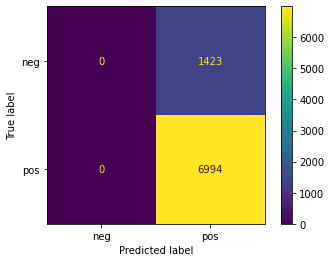

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, y_test_baseline_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

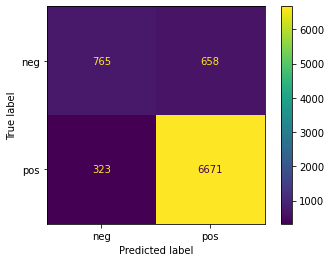

In [36]:
cm = confusion_matrix(Y_test, y_test_log_reg_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

### Result

#### Baseline Model
- Model correctly identified 0 negative sentiment reviews as negative. (True Negative - TN)
- Model correctly identified 6994 positive sentiment reviews as positive. (True Positive - TP)
- Model incorrectly identified 0 positive sentiment reviews as negative. (False Negative - FN)
- Model incorrectly identified 1423 negative sentiment reviews as positive. (False Positive - FP)


- Precision = TP/(TP+FP) = 6994/(6994+1423) = 0.8309373886182726

#### Logistic Regression
- Model correctly identified 761 negative sentiment reviews as negative. (True Negative - TN)
- Model correctly identified 6666 positive sentiment reviews as positive. (True Positive - TP)
- Model incorrectly identified 328 positive sentiment reviews as negative. (False Negative - FN)
- Model incorrectly identified 662 negative sentiment reviews as positive. (False Positive - FP)


- Precision = TP/(TP+FP) = 6666/(6666+662) = 0.9096615720524017

# Task 5 - Prediction of Predict Database
Use the better performing model (hopefully your logistic regression model) to predict the sentiment for the reviews provided in the predict dataset (download ‘predictdata.csv’ from the blackboard). Report the results in a dataframe format with columns ‘Id’, ‘Text’ and ‘Model Prediction’.

In [37]:
cleaned_predict_data.head()

,Id,Text,Label
0,1,the candy is tasty but they totally scam you o...,neg
1,2,i had been looking for the violet candy with t...,pos
2,3,these are very pricey so i only enjoy them now...,pos
3,4,these candies have a mild flavor when compared...,neg
4,5,this product is a bit pricey for the amt recei...,pos


In [38]:
X_predict = cleaned_predict_data['Text']

# make prediction on test data

# create BOW for test data
X_predict_BOW = vectorizer.transform(X_predict)

# predict using log_reg object
y_predict = log_reg.predict(X_predict_BOW)

# view the predictions
y_predict

array(['pos', 'pos', 'pos', 'pos', 'pos'], dtype=object)

In [39]:
cleaned_predict_data['Predicted'] = y_predict
cleaned_predict_data

,Id,Text,Label,Predicted
0,1,the candy is tasty but they totally scam you o...,neg,pos
1,2,i had been looking for the violet candy with t...,pos,pos
2,3,these are very pricey so i only enjoy them now...,pos,pos
3,4,these candies have a mild flavor when compared...,neg,pos
4,5,this product is a bit pricey for the amt recei...,pos,pos


# Task 6 - Frequent Words
What are the most frequent words in the review dataset (use a world cloud to show this, remove stop words) and show which words play a significant role in classify whether the review is positive or negative.

In [40]:
!pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

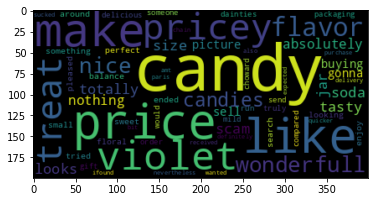

In [41]:
text = " ".join(cleaned_predict_data["Text"])
word_cloud = WordCloud(stopwords=set(stop_words)).generate(text)
plt.imshow(word_cloud, interpolation='bilinear');

In [42]:
# word_cloud words
word_cloud

In [43]:
### Important Words for Predictions
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

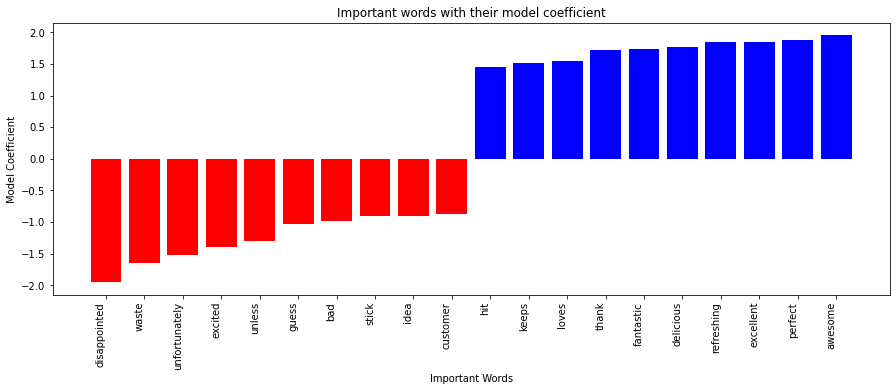

In [44]:
plot_coefficients(log_reg, vectorizer.get_feature_names_out())

# Task 7 - Classification with Unabalnced Data
Write in three lines with your own words about classification with unbalanced data. What is the issue with unbalanced data and how you could handle it in a better way (you don’t need to implement your solution)? Provide the issue with imbalanced classification and your suggestion in less than 4 sentences that reader can understand clearly using research from the internet resources.